In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import random
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('D:/Projects/online_auction_system/archive/auction.csv')
df.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


In [4]:
df.groupby(['item']).agg(total_count=('auctionid', 'count'))

,total_count
item,
Cartier wristwatch,1953
Palm Pilot M515 PDA,5917
Xbox game console,2811


In [5]:
missing_values_count = df.isnull().sum()
missing_values_count

auctionid        0
bid              0
bidtime          0
bidder          16
bidderrate      11
openbid          0
price            0
item             0
auction_type     0
dtype: int64

In [6]:
df['bidderrate'] = df.groupby('item')['bidderrate'].transform(lambda x: x.fillna(x.mean()))

In [7]:
# Get the count of missing values
missing_count = df['bidder'].isna().sum()

# Sample random non-missing values
random_values = df['bidder'].dropna().sample(n=missing_count, replace=True).reset_index(drop=True).values

# Fill missing values
mask = df['bidder'].isna()
df.loc[mask, 'bidder'] = random_values

In [8]:
missing_values_count = df.isnull().sum()
missing_values_count

auctionid       0
bid             0
bidtime         0
bidder          0
bidderrate      0
openbid         0
price           0
item            0
auction_type    0
dtype: int64

In [9]:
df.head(10)

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.00,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.00,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.00,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.00,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction
5,1639453840,1.00,0.355856,bfalconb,2.0,1.0,355.0,Cartier wristwatch,3 day auction
6,1639453840,1.25,0.484757,sbord,1.0,1.0,355.0,Cartier wristwatch,3 day auction
7,1639453840,1.50,0.492639,bfalconb,2.0,1.0,355.0,Cartier wristwatch,3 day auction
8,1639453840,25.00,0.494630,sbord,1.0,1.0,355.0,Cartier wristwatch,3 day auction
9,1639453840,2.00,0.511169,bfalconb,2.0,1.0,355.0,Cartier wristwatch,3 day auction


In [10]:
sns.set_theme(style="ticks")

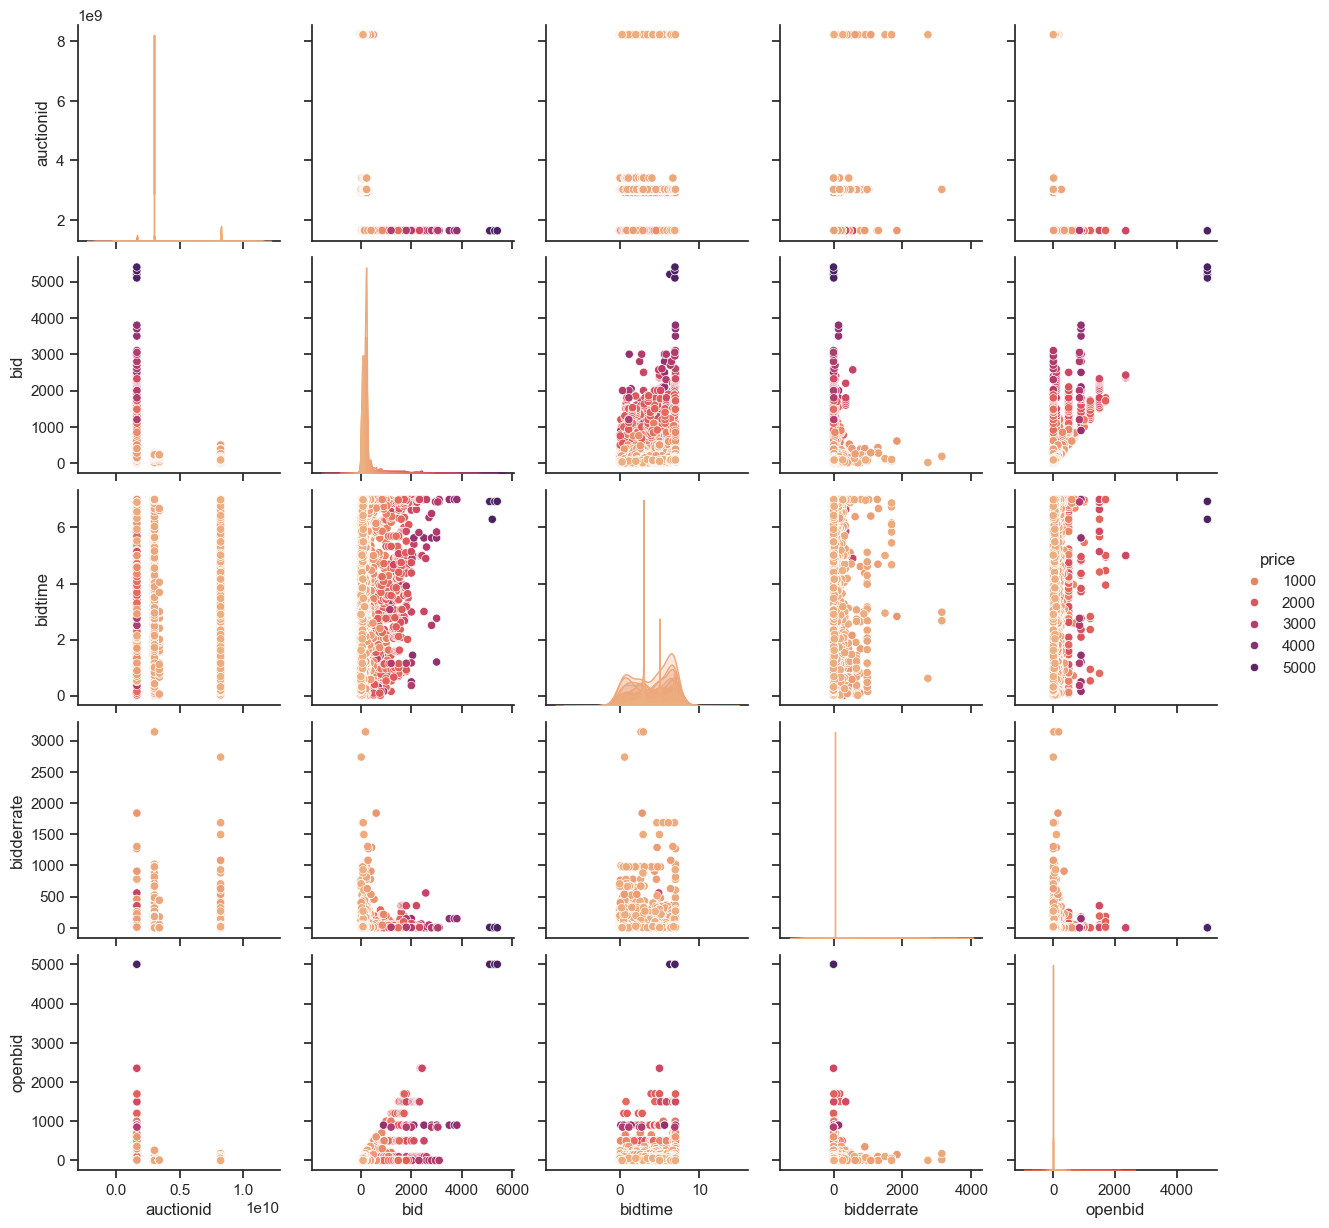

In [11]:
sns.pairplot(df, hue="price", palette="flare")

In [12]:
bidder_encoder = LabelEncoder()
df['bidder'] = bidder_encoder.fit_transform(df['bidder'])
df['bidder'] = df['bidder'].astype('category')
item_encoder = LabelEncoder()
df['item'] = item_encoder.fit_transform(df['item'])
df['item'] = df['item'].astype('category')
auction_type_encoder = LabelEncoder()
df['auction_type'] = auction_type_encoder.fit_transform(df['auction_type'])
df['auction_type'] = df['auction_type'].astype('category')
auction_id_encoder = LabelEncoder()
df['auctionid'] = auction_id_encoder.fit_transform(df['auctionid'])
df['auctionid'] = df['auctionid'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   auctionid     10681 non-null  category
 1   bid           10681 non-null  float64 
 2   bidtime       10681 non-null  float64 
 3   bidder        10681 non-null  category
 4   bidderrate    10681 non-null  float64 
 5   openbid       10681 non-null  float64 
 6   price         10681 non-null  float64 
 7   item          10681 non-null  category
 8   auction_type  10681 non-null  category
dtypes: category(4), float64(5)
memory usage: 611.5 KB


In [13]:
from numpy.random import default_rng
import numpy as np

unique_auctionids = np.unique(df['auctionid'])
rng = default_rng(42)
numbers = rng.choice(len(unique_auctionids), size=len(unique_auctionids), replace=False)
u_dict = dict(zip(unique_auctionids, numbers))
df['auctionid'] = df['auctionid'].map(u_dict)

In [14]:
total_records = len(df)
total_records

10681

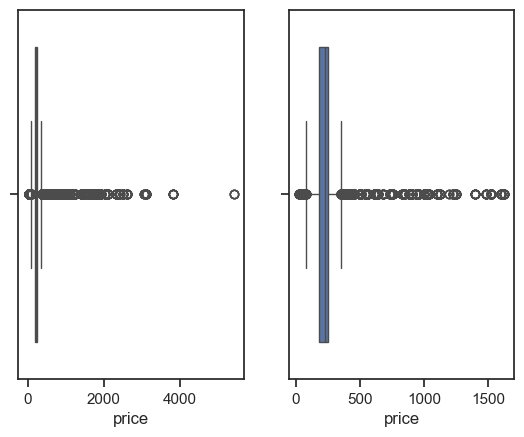

Number of outliers removed:  370


In [15]:
from scipy import stats
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.boxplot(x=df["price"], ax=ax1)
df = df[(np.abs(stats.zscore(df['price'])) < 3)]
sns.boxplot(x=df["price"], ax=ax2)
plt.show()
print("Number of outliers removed: ", total_records - len(df))

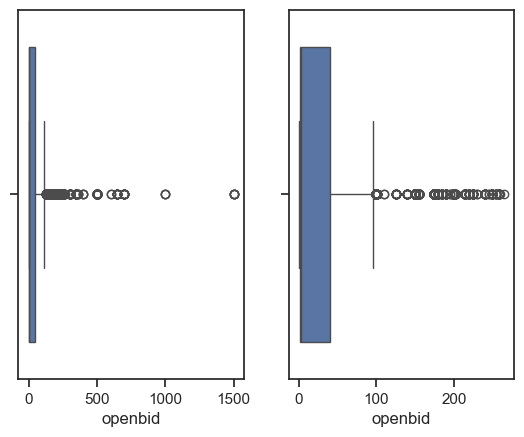

Number of outliers removed:  160


In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.boxplot(x=df["openbid"], ax=ax1)
previous_records = len(df)
df = df[(np.abs(stats.zscore(df['openbid'])) < 3)]
sns.boxplot(x=df["openbid"], ax=ax2)
plt.show()
print("Number of outliers removed: ", previous_records - len(df))

In [17]:
def find_boundaries(datacolumn):
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

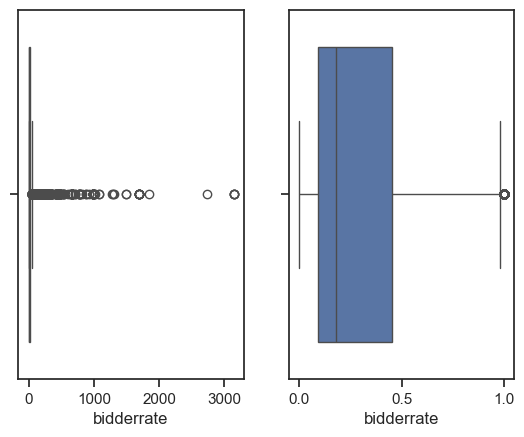

In [18]:
from sklearn.preprocessing import MinMaxScaler
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.boxplot(x=df["bidderrate"], ax=ax1)
(_, max_value) = find_boundaries(df['bidderrate'])
df['bidderrate'] = df['bidderrate'].clip(upper=max_value)
# normalise bidder rate
scaler = MinMaxScaler()
df['bidderrate'] = scaler.fit_transform(df['bidderrate'].values.reshape(-1,1))
sns.boxplot(x=df["bidderrate"], ax=ax2)
plt.show()

<Axes: xlabel='bidtime'>

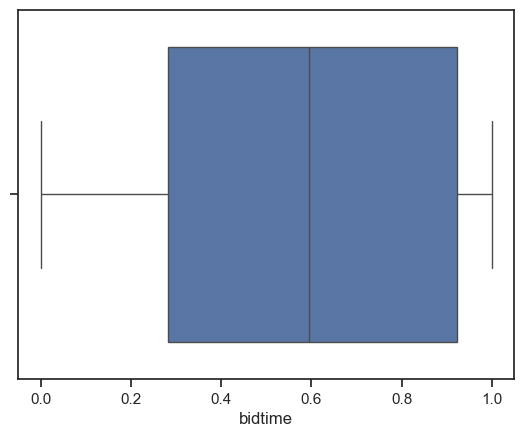

In [19]:
scaler = MinMaxScaler()
df['bidtime'] = scaler.fit_transform(df['bidtime'].values.reshape(-1,1))
sns.boxplot(x=df["bidtime"])

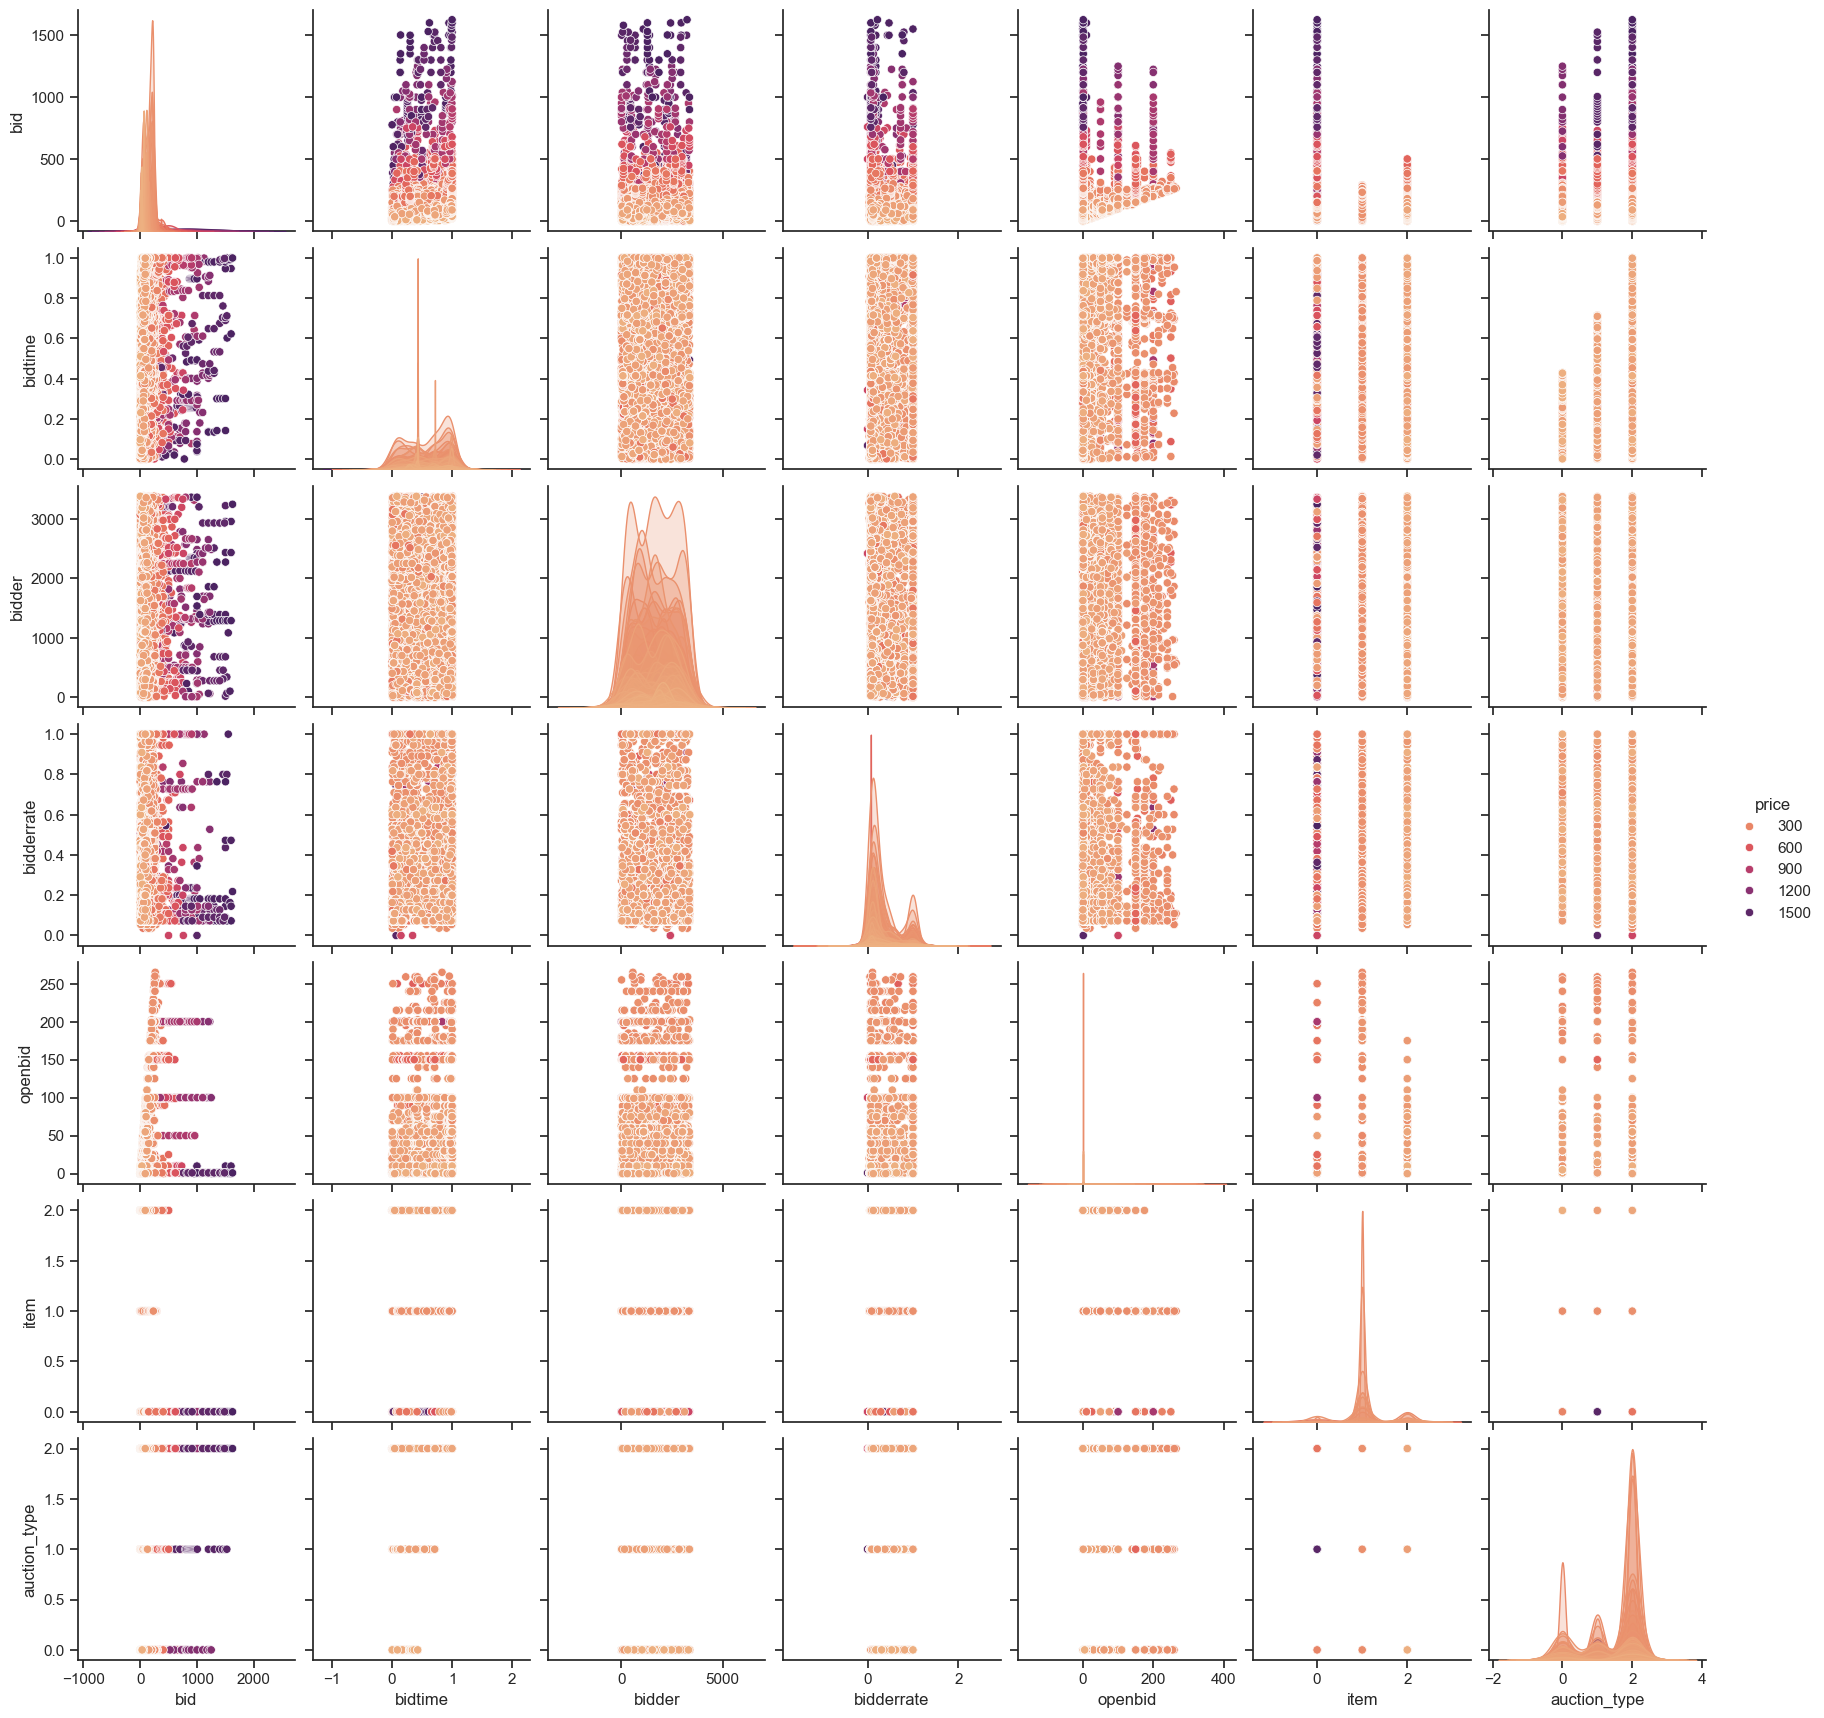

In [20]:
p_df = df.copy()
p_df['bidder'] = p_df['bidder'].astype('int')
p_df['item'] = p_df['item'].astype('int')
p_df['auction_type'] = p_df['auction_type'].astype('int')
p_df['auctionid'] = p_df['auctionid'].astype('category')
sns.pairplot(p_df, hue="price", palette="flare")

In [21]:
df = df.rename(columns={'auctionid': 'auction_id', 'openbid': 'open_price', 'bid': 'bid_value', 'bidtime': 'bid_time', 'bidder': 'bidder_id', 'price': 'closing_price', 'item': 'item_id'})
df.to_csv('D:/Projects/online_auction_system/1_prepared_data.csv', index=False)

In [22]:
df = pd.read_csv('D:/Projects/online_auction_system/1_prepared_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10151 entries, 0 to 10150
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   auction_id     10151 non-null  int64  
 1   bid_value      10151 non-null  float64
 2   bid_time       10151 non-null  float64
 3   bidder_id      10151 non-null  int64  
 4   bidderrate     10151 non-null  float64
 5   open_price     10151 non-null  float64
 6   closing_price  10151 non-null  float64
 7   item_id        10151 non-null  int64  
 8   auction_type   10151 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 713.9 KB


In [23]:
auction_df = df.groupby(['auction_id', 'open_price', 'closing_price', 'item_id', 'auction_type'], observed=True).agg(num_bids=('bidder_id', pd.Series.nunique)).reset_index()
auction_df = auction_df.drop(columns=['auction_id'])
auction_df.head()

,open_price,closing_price,item_id,auction_type,num_bids
0,1.00,455.0,0,2,12
1,0.01,225.0,1,0,20
2,1.00,61.0,2,2,11
3,1.00,212.5,1,0,8
4,0.01,106.0,2,1,13


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

X = auction_df.drop(columns=['closing_price', 'num_bids'], axis=1)
y = auction_df['num_bids']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr = LinearRegression()

rmse_scores = cross_val_score(lr, X, y, cv=kf, scoring='neg_root_mean_squared_error')
mean_rmse = -rmse_scores.mean()

print(f"Mean RMSE: {mean_rmse:.2f}")

Mean RMSE: 3.25


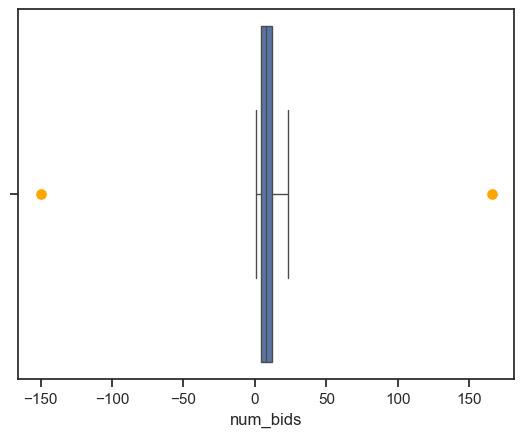

In [49]:
fig, ax = plt.subplots()
sns.boxplot(x=auction_df['num_bids'],  ax=ax)
sns.scatterplot(x=[auction_df['num_bids'].median() - mean_rmse, auction_df['num_bids'].median() + mean_rmse], y=0, color='orange', s=70, ax=ax, zorder=100)
plt.show()

In [26]:
auction_df['item_id'] = auction_df['item_id'].astype('category')
auction_df['auction_type'] = auction_df['auction_type'].astype('category')
auction_df.dtypes

open_price        float64
closing_price     float64
item_id          category
auction_type     category
num_bids            int64
dtype: object

In [27]:
import xgboost as xgb

X = auction_df.drop(columns=['closing_price', 'num_bids'], axis=1)
y = auction_df['num_bids']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
booster = xgb.XGBRegressor(tree_method="approx", enable_categorical=True, eta=0.3, max_depth=3, n_estimators=11)

rmse_scores = cross_val_score(booster, X, y, cv=kf, scoring='neg_root_mean_squared_error')
mean_rmse = -rmse_scores.mean()

print(f"Mean RMSE: {mean_rmse:.2f}")

auction_num_bids_model = booster.fit(X, y)

Mean RMSE: 2.92


In [29]:
auction_num_bids_model.save_model('D:/Projects/online_auction_system/2_bid_num_prediction.json')

In [30]:
X = auction_df.drop(columns=['closing_price'], axis=1)
y = auction_df['closing_price']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr = LinearRegression()

rmse_scores = cross_val_score(lr, X, y, cv=kf, scoring='neg_root_mean_squared_error')
mean_rmse = -rmse_scores.mean()

print(f"Mean RMSE: {mean_rmse:.2f}")

Mean RMSE: 168.48


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19876\240296404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=auction_df['closing_price'], palette='flare', ax=ax)


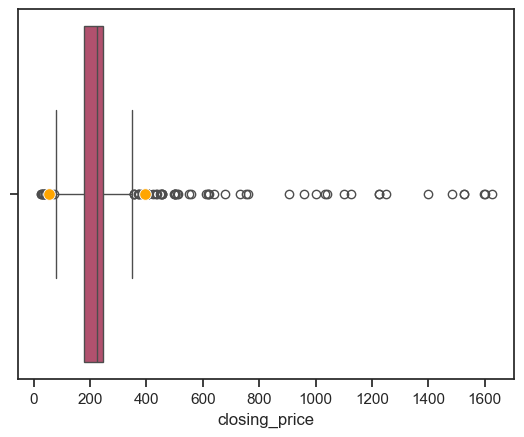

In [34]:
fig, ax = plt.subplots()
sns.boxplot(x=auction_df['closing_price'], palette='flare', ax=ax)
sns.scatterplot(x=[auction_df['closing_price'].median() - mean_rmse, auction_df['closing_price'].median() + mean_rmse], y=0, color='orange', s=70, ax=ax, zorder=100)
plt.show()

In [35]:
X = auction_df.drop('closing_price', axis=1)
y = auction_df['closing_price']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
booster = xgb.XGBRegressor(tree_method="approx", enable_categorical=True)

rmse_scores = cross_val_score(booster, X, y, cv=kf, scoring='neg_root_mean_squared_error')
mean_rmse = -rmse_scores.mean()

print(f"Mean RMSE: {mean_rmse:.2f}")

Mean RMSE: 188.94


Mean RMSE: 157.84


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19876\1123868929.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=auction_df['closing_price'], palette='flare', ax=ax)


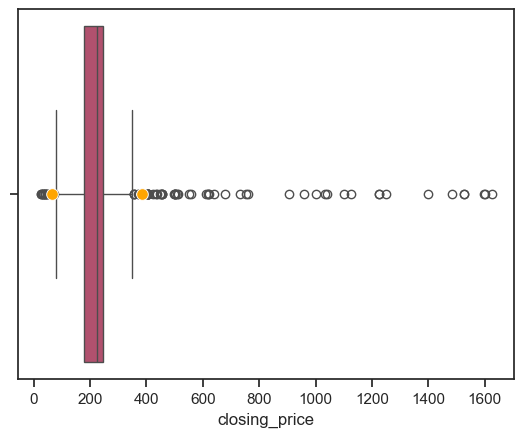

In [52]:
X = auction_df.drop('closing_price', axis=1)
y = auction_df['closing_price']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
booster = xgb.XGBRegressor(tree_method="approx", enable_categorical=True, eta = 0.03, max_depth = 2, n_estimators = 100, subsample = 0.5)

rmse_scores = cross_val_score(booster, X, y, cv=kf, scoring='neg_root_mean_squared_error')
mean_rmse = -rmse_scores.mean()

print(f"Mean RMSE: {mean_rmse:.2f}")
fig, ax = plt.subplots()
sns.boxplot(x=auction_df['closing_price'], palette='flare', ax=ax)
sns.scatterplot(x=[auction_df['closing_price'].median() - mean_rmse, auction_df['closing_price'].median() + mean_rmse], y=0, color='orange', s=70, ax=ax, zorder=100)
plt.show()

In [53]:
(min_boundary, max_boundary) = find_boundaries(auction_df['closing_price'])
reduced_auction_df = auction_df.copy()[(auction_df['closing_price'] >= min_boundary) & (auction_df['closing_price'] <= max_boundary)]
reduced_auction_df.groupby(['item_id'], observed=True)['auction_type'].value_counts()

item_id  auction_type
0        2                25
         0                 5
         1                 4
1        2               195
         0                95
         1                54
2        2                81
         0                32
         1                19
Name: count, dtype: int64

Mean RMSE: 31.30


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19876\1821821640.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=reduced_auction_df['closing_price'], palette='flare', ax=ax)


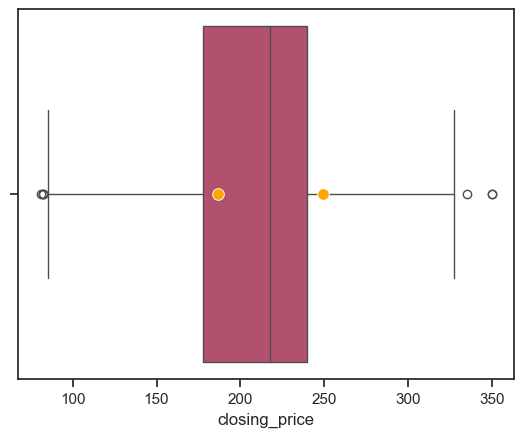

In [54]:
(min_boundary, max_boundary) = find_boundaries(auction_df['closing_price'])
reduced_auction_df = auction_df.copy()[(auction_df['closing_price'] >= min_boundary) & (auction_df['closing_price'] <= max_boundary)]
X = reduced_auction_df.drop('closing_price', axis=1)
y = reduced_auction_df['closing_price']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
booster = xgb.XGBRegressor(tree_method="approx", enable_categorical=True, eta = 0.06, max_depth = 2, n_estimators = 110, subsample = 0.9)

rmse_scores = cross_val_score(booster, X, y, cv=kf, scoring='neg_root_mean_squared_error')
mean_rmse = -rmse_scores.mean()

print(f"Mean RMSE: {mean_rmse:.2f}")
fig, ax = plt.subplots()
sns.boxplot(x=reduced_auction_df['closing_price'], palette='flare', ax=ax)
sns.scatterplot(x=[reduced_auction_df['closing_price'].median() - mean_rmse, reduced_auction_df['closing_price'].median() + mean_rmse], y=0, color='orange', s=70, ax=ax, zorder=100)
plt.show()

auction_price_estimation_model = booster.fit(X, y)

In [56]:
auction_price_estimation_model.save_model('2_price_estimation.json')

In [57]:
df = pd.read_csv('1_prepared_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10151 entries, 0 to 10150
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   auction_id     10151 non-null  int64  
 1   bid_value      10151 non-null  float64
 2   bid_time       10151 non-null  float64
 3   bidder_id      10151 non-null  int64  
 4   bidderrate     10151 non-null  float64
 5   open_price     10151 non-null  float64
 6   closing_price  10151 non-null  float64
 7   item_id        10151 non-null  int64  
 8   auction_type   10151 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 713.9 KB


In [58]:
bids_df = df.groupby(['auction_id', 'bidder_id', 'item_id', 'auction_type']).agg(
    bid_value=('bid_value', 'max'),
    bid_time=('bid_time', 'max'),
    bidder_rate=('bidderrate', 'max'),
    open_price=('open_price', 'max'),
    closing_price=('closing_price', 'max')
    ).reset_index()
bids_df = bids_df.drop(columns=['bidder_id'])
bids_df.head()

,auction_id,item_id,auction_type,bid_value,bid_time,bidder_rate,open_price,closing_price
0,0,0,2,15.00,0.090697,0.327273,1.0,455.0
1,0,0,2,1.00,0.037607,1.000000,1.0,455.0
2,0,0,2,1.25,0.061688,0.072727,1.0,455.0
3,0,0,2,400.00,0.669285,0.200000,1.0,455.0
4,0,0,2,455.00,0.941665,0.254545,1.0,455.0


In [59]:
def sort_within_group(group):
    return group.sort_values(by='bid_value', ascending=True)
bids_df = bids_df.groupby(['auction_id'], observed=True).apply(sort_within_group).reset_index(drop=True)
bids_df['rank'] = bids_df.groupby(['auction_id'])['bid_value'].rank(method='dense')
bids_df['rank'] = bids_df['rank'].astype(int)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19876\3901388614.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bids_df = bids_df.groupby(['auction_id'], observed=True).apply(sort_within_group).reset_index(drop=True)


In [60]:
bids_df['num_bids'] = bids_df.groupby('auction_id')['item_id'].transform('count')
bids_df['num_bids'] = bids_df['num_bids'].astype(int)

In [61]:
groups = bids_df.groupby('auction_id')
bids_df['prev_bid_value'] = groups['bid_value'].shift(1)
bids_df['prev_bid_value'] = bids_df['prev_bid_value'].fillna(bids_df['open_price'])

In [62]:
out = (bids_df
       .assign(average=bids_df
               .groupby(['auction_id'])['prev_bid_value']
               .transform(lambda x: x.expanding().mean().shift(1))
               )
       )
out[['prev_bid_value', 'prev_bid_value_avg']] = out[['prev_bid_value', 'average']].ffill(axis=1)
bids_df = out.drop('average', axis=1)
bids_df.head(12)

,auction_id,item_id,auction_type,bid_value,bid_time,bidder_rate,open_price,closing_price,rank,num_bids,prev_bid_value,prev_bid_value_avg
0,0,0,2,1.00,0.037607,1.000000,1.0,455.0,1,12,1.00,1.000000
1,0,0,2,1.25,0.061688,0.072727,1.0,455.0,2,12,1.00,1.000000
2,0,0,2,15.00,0.090697,0.327273,1.0,455.0,3,12,1.25,1.000000
3,0,0,2,51.00,0.108104,0.436364,1.0,455.0,4,12,15.00,1.083333
4,0,0,2,55.00,0.212425,0.600000,1.0,455.0,5,12,51.00,4.562500
5,0,0,2,166.00,0.061892,1.000000,1.0,455.0,6,12,55.00,13.850000
6,0,0,2,295.00,0.299562,0.145455,1.0,455.0,7,12,166.00,20.708333
7,0,0,2,320.00,0.396898,0.254545,1.0,455.0,8,12,295.00,41.464286
8,0,0,2,400.00,0.669285,0.200000,1.0,455.0,9,12,320.00,73.156250
9,0,0,2,420.00,0.996491,0.127273,1.0,455.0,10,12,400.00,100.583333


In [64]:
bids_df.to_csv('3_bids.csv', index=False)

In [65]:
bids_df = bids_df.drop(columns=['auction_id', 'bid_value'])

In [66]:
bids_df['item_id'] = bids_df['item_id'].astype('category')
bids_df['auction_type'] = bids_df['auction_type'].astype('category')
bids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4928 entries, 0 to 4927
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   item_id             4928 non-null   category
 1   auction_type        4928 non-null   category
 2   bid_time            4928 non-null   float64 
 3   bidder_rate         4928 non-null   float64 
 4   open_price          4928 non-null   float64 
 5   closing_price       4928 non-null   float64 
 6   rank                4928 non-null   int32   
 7   num_bids            4928 non-null   int32   
 8   prev_bid_value      4928 non-null   float64 
 9   prev_bid_value_avg  4928 non-null   float64 
dtypes: category(2), float64(6), int32(2)
memory usage: 279.5 KB


In [67]:
X = bids_df.drop(columns=['bidder_rate', 'bid_time'], axis=1)
y = bids_df['bidder_rate']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr = LinearRegression()

rmse_scores = cross_val_score(lr, X, y, cv=kf, scoring='neg_root_mean_squared_error')
mean_rmse = -rmse_scores.mean()

print(f"Mean RMSE: {mean_rmse:.2f}")
print(f"Standard deviation: {bids_df['bidder_rate'].std():.2f}")

Mean RMSE: 0.34
Standard deviation: 0.35


Mean RMSE: 0.34


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19876\4048051808.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=bids_df['bidder_rate'], palette='flare', ax=ax)


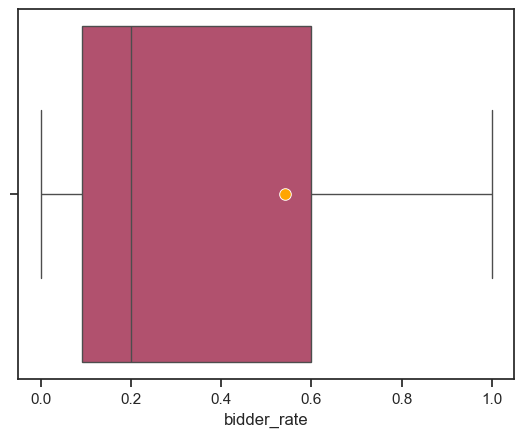

In [68]:
X = bids_df.drop(columns=['bidder_rate', 'bid_time'], axis=1)
y = bids_df['bidder_rate']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
booster = xgb.XGBRegressor(tree_method="approx", enable_categorical=True, eta = 0.04, max_depth = 3, n_estimators = 100, subsample = 0.8)

rmse_scores = cross_val_score(booster, X, y, cv=kf, scoring='neg_root_mean_squared_error')
mean_rmse = -rmse_scores.mean()

print(f"Mean RMSE: {mean_rmse:.2f}")
fig, ax = plt.subplots()
sns.boxplot(x=bids_df['bidder_rate'], palette='flare', ax=ax)
sns.scatterplot(x=[bids_df['bidder_rate'].median() + mean_rmse], y=0, color='orange', s=70, ax=ax, zorder=100)
plt.show()
bid_rate_prediction_model = booster.fit(X, y)

In [69]:
bid_rate_prediction_model.save_model('3_bid_rate_prediction.json')

In [70]:
X = bids_df.drop(columns=['bid_time'], axis=1)
y = bids_df['bid_time']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr = LinearRegression()

rmse_scores = cross_val_score(lr, X, y, cv=kf, scoring='neg_root_mean_squared_error')
mean_rmse = -rmse_scores.mean()

print(f"Mean RMSE: {mean_rmse:.2f}")
print(f"Standard deviation: {bids_df['bid_time'].std():.2f}")

Mean RMSE: 0.19
Standard deviation: 0.34


Mean RMSE: 0.15


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19876\93703913.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=bids_df['bid_time'], palette='flare', ax=ax)


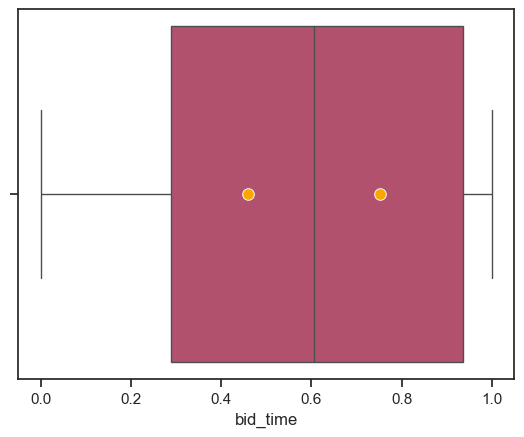

In [71]:
X = bids_df.drop(columns=['bid_time'], axis=1)
y = bids_df['bid_time']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
booster = xgb.XGBRegressor(tree_method="approx", enable_categorical=True, eta = 0.065, max_depth = 6, n_estimators = 250, subsample = 0.7)

rmse_scores = cross_val_score(booster, X, y, cv=kf, scoring='neg_root_mean_squared_error')
mean_rmse = -rmse_scores.mean()

print(f"Mean RMSE: {mean_rmse:.2f}")
fig, ax = plt.subplots()
sns.boxplot(x=bids_df['bid_time'], palette='flare', ax=ax)
sns.scatterplot(x=[bids_df['bid_time'].median() - mean_rmse, bids_df['bid_time'].median() + mean_rmse], y=0, color='orange', s=70, ax=ax, zorder=100)
plt.show()
bid_time_prediction_model = booster.fit(X, y)

In [73]:
bid_time_prediction_model.save_model('3_bid_time_prediction.json')

In [75]:
bids_df = pd.read_csv('3_bids.csv')
bids_df = bids_df.drop(columns=['auction_id'])
bids_df['item_id'] = bids_df['item_id'].astype('category')
bids_df['auction_type'] = bids_df['auction_type'].astype('category')
bids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4928 entries, 0 to 4927
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   item_id             4928 non-null   category
 1   auction_type        4928 non-null   category
 2   bid_value           4928 non-null   float64 
 3   bid_time            4928 non-null   float64 
 4   bidder_rate         4928 non-null   float64 
 5   open_price          4928 non-null   float64 
 6   closing_price       4928 non-null   float64 
 7   rank                4928 non-null   int64   
 8   num_bids            4928 non-null   int64   
 9   prev_bid_value      4928 non-null   float64 
 10  prev_bid_value_avg  4928 non-null   float64 
dtypes: category(2), float64(7), int64(2)
memory usage: 356.5 KB


In [76]:
X = bids_df.drop(columns=['bid_value'], axis=1)
y = bids_df['bid_value']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr = LinearRegression()

rmse_scores = cross_val_score(lr, X, y, cv=kf, scoring='neg_root_mean_squared_error')
mean_rmse = -rmse_scores.mean()

print(f"Mean RMSE: {mean_rmse:.2f}")
print(f"Standard deviation: {bids_df['bid_value'].std():.2f}")

Mean RMSE: 39.04
Standard deviation: 157.28


Mean RMSE: 39.30


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19876\2157446672.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=bids_df['bid_value'], palette='flare', ax=ax)


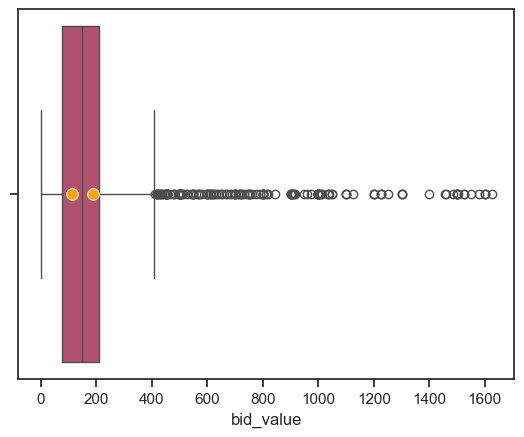

In [77]:
X = bids_df.drop(columns=['bid_value'], axis=1)
y = bids_df['bid_value']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
booster = xgb.XGBRegressor(tree_method="approx", enable_categorical=True, eta = 0.04, max_depth = 8, n_estimators = 140, subsample = 0.4)

rmse_scores = cross_val_score(booster, X, y, cv=kf, scoring='neg_root_mean_squared_error')
mean_rmse = -rmse_scores.mean()

print(f"Mean RMSE: {mean_rmse:.2f}")
fig, ax = plt.subplots()
sns.boxplot(x=bids_df['bid_value'], palette='flare', ax=ax)
sns.scatterplot(x=[bids_df['bid_value'].median() - mean_rmse, bids_df['bid_value'].median() + mean_rmse], y=0, color='orange', s=70, ax=ax, zorder=100)
plt.show()
bid_value_prediction_model = booster.fit(X, y)

In [78]:
bid_value_prediction_model.save_model('4_bid_value_prediction.json')

In [79]:
bids_data = pd.read_csv('3_bids.csv')
bids_data = bids_data.drop(columns=['auction_id'])
bids_data['bid_value_delta'] = bids_data['bid_value'] - bids_data['prev_bid_value']

bids_data['item_id'] = bids_data['item_id'].astype('category')
bids_data['auction_type'] = bids_data['auction_type'].astype('category')
bids_data.head()

,item_id,auction_type,bid_value,bid_time,bidder_rate,open_price,closing_price,rank,num_bids,prev_bid_value,prev_bid_value_avg,bid_value_delta
0,0,2,1.00,0.037607,1.000000,1.0,455.0,1,12,1.00,1.000000,0.00
1,0,2,1.25,0.061688,0.072727,1.0,455.0,2,12,1.00,1.000000,0.25
2,0,2,15.00,0.090697,0.327273,1.0,455.0,3,12,1.25,1.000000,13.75
3,0,2,51.00,0.108104,0.436364,1.0,455.0,4,12,15.00,1.083333,36.00
4,0,2,55.00,0.212425,0.600000,1.0,455.0,5,12,51.00,4.562500,4.00


In [80]:
X = bids_data.drop(columns=['closing_price'], axis=1)
y = bids_data['closing_price']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr = LinearRegression()

rmse_scores = cross_val_score(lr, X, y, cv=kf, scoring='neg_root_mean_squared_error')
mean_rmse = -rmse_scores.mean()

print(f"Mean RMSE: {mean_rmse:.2f}")
print(f"Standard deviation: {bids_data['closing_price'].std():.2f}")

Mean RMSE: 109.81
Standard deviation: 206.48


Mean RMSE: 76.75


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19876\4095341441.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=bids_data['closing_price'], palette='flare', ax=ax)


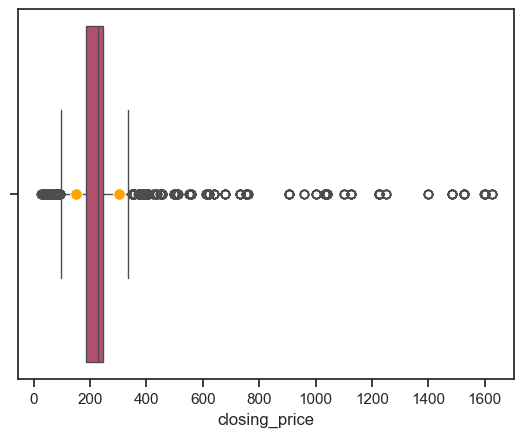

In [81]:
X = bids_data.drop(columns=['closing_price'], axis=1)
y = bids_data['closing_price']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
booster = xgb.XGBRegressor(tree_method="approx", enable_categorical=True, eta = 0.03, max_depth = 11, n_estimators = 250, subsample = 0.5)

rmse_scores = cross_val_score(booster, X, y, cv=kf, scoring='neg_root_mean_squared_error')
mean_rmse = -rmse_scores.mean()

print(f"Mean RMSE: {mean_rmse:.2f}")
fig, ax = plt.subplots()
sns.boxplot(x=bids_data['closing_price'], palette='flare', ax=ax)
sns.scatterplot(x=[bids_data['closing_price'].median() - mean_rmse, bids_data['closing_price'].median() + mean_rmse], y=0, color='orange', s=70, ax=ax, zorder=100)
plt.show()
bid_closing_price_estimator = booster.fit(X, y)

In [82]:
bid_closing_price_estimator.save_model('5_bid_closing_price_estimator.json')

In [83]:
auction_bids = pd.read_csv('3_bids.csv')
groups = auction_bids.groupby('auction_id')
mean_bid_value = groups['bid_value'].mean()
median_bid_value = groups['bid_value'].median()

auction_bids['bid_value_mean'] = auction_bids['auction_id'].map(mean_bid_value)
auction_bids['bid_value_median'] = auction_bids['auction_id'].map(median_bid_value)
auction_bids = auction_bids.drop(columns=['auction_id'])
auction_bids['item_id'] = auction_bids['item_id'].astype('category')
auction_bids['auction_type'] = auction_bids['auction_type'].astype('category')

auction_bids.head(40)

,item_id,auction_type,bid_value,bid_time,bidder_rate,open_price,closing_price,rank,num_bids,prev_bid_value,prev_bid_value_avg,bid_value_mean,bid_value_median
0,0,2,1.00,0.037607,1.000000,1.00,455.0,1,12,1.00,1.000000,219.104167,230.50
1,0,2,1.25,0.061688,0.072727,1.00,455.0,2,12,1.00,1.000000,219.104167,230.50
2,0,2,15.00,0.090697,0.327273,1.00,455.0,3,12,1.25,1.000000,219.104167,230.50
3,0,2,51.00,0.108104,0.436364,1.00,455.0,4,12,15.00,1.083333,219.104167,230.50
4,0,2,55.00,0.212425,0.600000,1.00,455.0,5,12,51.00,4.562500,219.104167,230.50
5,0,2,166.00,0.061892,1.000000,1.00,455.0,6,12,55.00,13.850000,219.104167,230.50
6,0,2,295.00,0.299562,0.145455,1.00,455.0,7,12,166.00,20.708333,219.104167,230.50
7,0,2,320.00,0.396898,0.254545,1.00,455.0,8,12,295.00,41.464286,219.104167,230.50
8,0,2,400.00,0.669285,0.200000,1.00,455.0,9,12,320.00,73.156250,219.104167,230.50
9,0,2,420.00,0.996491,0.127273,1.00,455.0,10,12,400.00,100.583333,219.104167,230.50


In [84]:
X = auction_bids.drop(columns=['closing_price'], axis=1)
y = auction_bids['closing_price']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr = LinearRegression()

rmse_scores = cross_val_score(lr, X, y, cv=kf, scoring='neg_root_mean_squared_error')
mean_rmse = -rmse_scores.mean()

print(f"Mean RMSE: {mean_rmse:.2f}")
print(f"Standard deviation: {auction_bids['closing_price'].std():.2f}")

Mean RMSE: 50.30
Standard deviation: 206.48


Mean RMSE: 6.41


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19876\3177832356.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=auction_bids['closing_price'], palette='flare', ax=ax)


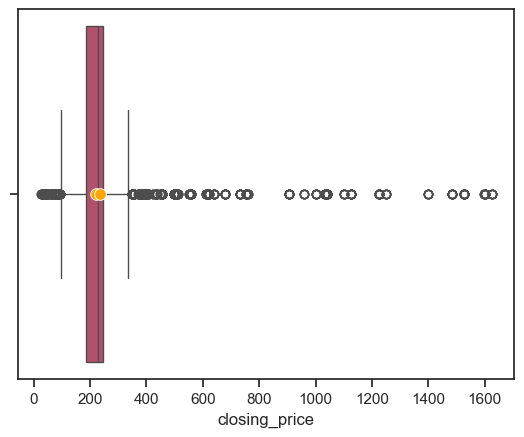

In [85]:
X = auction_bids.drop(columns=['closing_price'], axis=1)
y = auction_bids['closing_price']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
booster = xgb.XGBRegressor(tree_method="approx", enable_categorical=True, eta = 0.03, max_depth = 11, n_estimators = 250, subsample = 0.5)

rmse_scores = cross_val_score(booster, X, y, cv=kf, scoring='neg_root_mean_squared_error')
mean_rmse = -rmse_scores.mean()

print(f"Mean RMSE: {mean_rmse:.2f}")
fig, ax = plt.subplots()
sns.boxplot(x=auction_bids['closing_price'], palette='flare', ax=ax)
sns.scatterplot(x=[auction_bids['closing_price'].median() - mean_rmse, auction_bids['closing_price'].median() + mean_rmse], y=0, color='orange', s=70, ax=ax, zorder=100)
plt.show()
final_price_prediction_model = booster.fit(X, y)

In [86]:
final_price_prediction_model.save_model('5_final_price_prediction.json')

In [87]:
from enum import Enum

class ItemId(Enum):
    CartierWristwatch = 0
    PalmPilotM515PDA = 1
    XboxGameConsole = 2

class AuctionType(Enum):
    ThreeDay = 0
    FiveDay = 1
    SevenDay = 2

In [88]:
def generate_bids(
    item_id: ItemId,
    auction_type: AuctionType,
    open_price: float,
    bid_num_prediction_model: xgb.Booster,
    auction_price_estimation_model: xgb.Booster,
    bid_rate_prediction_model: xgb.Booster,
    bid_time_prediction_model: xgb.Booster,
    bid_value_prediction_model: xgb.Booster,
    bid_closing_price_prediction_model: xgb.Booster,
    final_auction_price_prediction_model: xgb.Booster,
    verbose=False
):

    # we first construct an auction data frame, without the bids and closing_price to predict number of bids
    auction_df = pd.DataFrame({
        'open_price': [open_price],
        'item_id': [item_id.value],
        'auction_type': [auction_type.value]
    }
    )
    bid_num_pred = bid_num_prediction_model.predict(xgb.DMatrix(auction_df))
    bid_num = int(round(bid_num_pred[0]))
    if verbose:
        print(f"Number of bids {bid_num}")
    # now we will estimate auction closing price without any bids
    auction_df['num_bids'] = [bid_num]
    auction_closing_price_pred = auction_price_estimation_model.predict(xgb.DMatrix(auction_df))
    estimated_auction_closing_price = float(round(auction_closing_price_pred[0], 2))
    if verbose:
        print(f"Estimated auction closing price {estimated_auction_closing_price}")
    # we will define a function to predict bid's based on closing price
    def predict_bid(auction_closing_price: float, rank: int, prev_bid_value: float, prev_bid_value_avg: float):
        bid_df = pd.DataFrame({
            'item_id': [item_id.value],
            'auction_type': [auction_type.value],
            'open_price': [open_price],
            'closing_price': [auction_closing_price],
            'rank': [rank],
            'num_bids': [bid_num],
            'prev_bid_value': [prev_bid_value],
            'prev_bid_value_avg': [prev_bid_value_avg]
        })
        bid_rate_pred = bid_rate_prediction_model.predict(xgb.DMatrix(bid_df))
        bid_rate = float(round(bid_rate_pred[0], 2))
        bid_df.insert(2, 'bidder_rate', [bid_rate])
        bid_time_pred = bid_time_prediction_model.predict(xgb.DMatrix(bid_df))
        bid_time = float(round(bid_time_pred[0], 2))
        bid_df.insert(2, 'bid_time', [bid_time])
        bid_value_pred = bid_value_prediction_model.predict(xgb.DMatrix(bid_df))
        bid_value = round(float(bid_value_pred[0]), 2)
        bid_df.insert(2, 'bid_value', [bid_value])
        bid_df['bid_value_delta'] = bid_df['bid_value'] - bid_df['prev_bid_value']
        return bid_df[['item_id', 'auction_type', 'bid_value', 'bid_time', 'bidder_rate', 'open_price', 'closing_price', 'rank', 'num_bids', 'prev_bid_value', 'prev_bid_value_avg', 'bid_value_delta']]
    # first bid is different, we use estimate auction price as closing price
    bid = predict_bid(auction_closing_price=estimated_auction_closing_price, rank=1, prev_bid_value=open_price, prev_bid_value_avg=open_price)
    # now we will predict the closing price with the first bid
    closing_price_estimation = bid_closing_price_pred = bid_closing_price_prediction_model.predict(xgb.DMatrix(bid.drop(columns=['closing_price'])))
    estimated_closing_price = float(round(closing_price_estimation[0], 2))
    if verbose:
        print(f"Estimated closing price {estimated_closing_price}")
    bid['closing_price'] = [estimated_closing_price]
    bids = bid.copy()
    # now we will predict the rest of the bids
    for i in range(2, bid_num + 1):
        new_bid = predict_bid(auction_closing_price=estimated_closing_price, rank=i, prev_bid_value=bids['bid_value'].iloc[-1], prev_bid_value_avg=bids['bid_value'].mean())
        # we update the closing price with each new bid
        estimated_closing_price = bid_closing_price_prediction_model.predict(xgb.DMatrix(new_bid.drop(columns=['closing_price'])))
        estimated_closing_price = float(round(closing_price_estimation[0], 2))
        bids = pd.concat(
            [
                bids,
                new_bid
            ]
        )
        bids['closing_price'] = [estimated_closing_price] * len(bids)
    # finally we will predict the final auction price using the average of the bids, and re-estimate the bids using the final auction price
    final_price_bids_df = bids.copy()
    final_price_bids_df = final_price_bids_df.drop(columns=['closing_price', 'bid_value_delta'])
    final_price_bids_df['bid_value_mean'] = final_price_bids_df['bid_value'].mean()
    final_price_bids_df['bid_value_median'] = final_price_bids_df['bid_value'].median()
    final_auction_price_pred = final_auction_price_prediction_model.predict(xgb.DMatrix(final_price_bids_df))
    final_price = round(float(final_auction_price_pred.mean()), 2)
    if verbose:
        print(f"Final auction price {final_price}")
    # predict the bids again with the final price
    bids = bids[0:0]
    for i in range(1, bid_num + 1):
        prev_bid_value = bids['bid_value'].iloc[-1] if i > 1 else open_price
        prev_bid_value_avg = bids['bid_value'].mean() if i > 1 else open_price
        new_bid = predict_bid(auction_closing_price=final_price, rank=i, prev_bid_value=prev_bid_value, prev_bid_value_avg=prev_bid_value_avg)
        bids = pd.concat(
            [
                bids,
                new_bid
            ]
        )
    if bids.iloc[-1]['bid_value'] != final_price:
        bids['closing_price'] = bids.iloc[-1]['bid_value']
    return bids

In [90]:
bid_num_prediction_model = xgb.Booster()
bid_num_prediction_model.load_model('2_bid_num_prediction.json')
auction_price_estimation_model = xgb.Booster()
auction_price_estimation_model.load_model('2_price_estimation.json')
bid_rate_prediction_model = xgb.Booster()
bid_rate_prediction_model.load_model('3_bid_rate_prediction.json')
bit_time_prediction_model = xgb.Booster()
bit_time_prediction_model.load_model('3_bid_time_prediction.json')
bid_value_prediction_model = xgb.Booster()
bid_value_prediction_model.load_model('4_bid_value_prediction.json')
bid_closing_price_prediction_model = xgb.Booster()
bid_closing_price_prediction_model.load_model('5_bid_closing_price_estimator.json')
final_price_prediction_model = xgb.Booster()
final_price_prediction_model.load_model('5_final_price_prediction.json')

bids = generate_bids(
    ItemId.PalmPilotM515PDA,
    AuctionType.ThreeDay,
    5.5,
    bid_num_prediction_model,
    auction_price_estimation_model,
    bid_rate_prediction_model,
    bit_time_prediction_model,
    bid_value_prediction_model,
    bid_closing_price_prediction_model,
    final_price_prediction_model,
    verbose=True
)
bids.head(20)

Number of bids 11
Estimated auction closing price 224.3699951171875
Estimated closing price 229.0
Final auction price 215.25


,item_id,auction_type,bid_value,bid_time,bidder_rate,open_price,closing_price,rank,num_bids,prev_bid_value,prev_bid_value_avg,bid_value_delta
0,1,0,24.75,0.03,0.41,5.5,214.26,1,11,5.50,5.500000,19.25
0,1,0,46.75,0.13,0.38,5.5,214.26,2,11,24.75,24.750000,22.00
0,1,0,68.33,0.13,0.41,5.5,214.26,3,11,46.75,35.750000,21.58
0,1,0,90.53,0.23,0.38,5.5,214.26,4,11,68.33,46.610000,22.20
0,1,0,113.91,0.32,0.39,5.5,214.26,5,11,90.53,57.590000,23.38
0,1,0,136.77,0.34,0.38,5.5,214.26,6,11,113.91,68.854000,22.86
0,1,0,160.75,0.34,0.37,5.5,214.26,7,11,136.77,80.173333,23.98
0,1,0,183.25,0.34,0.37,5.5,214.26,8,11,160.75,91.684286,22.50
0,1,0,198.66,0.37,0.36,5.5,214.26,9,11,183.25,103.130000,15.41
0,1,0,208.36,0.39,0.37,5.5,214.26,10,11,198.66,113.744444,9.70


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19876\1182591467.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="rank", y="bid_value",
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19876\1182591467.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="rank", y="bid_value", palette="flare", marker="o", data=p_bids, ax=ax, color="darkred", lw=3)


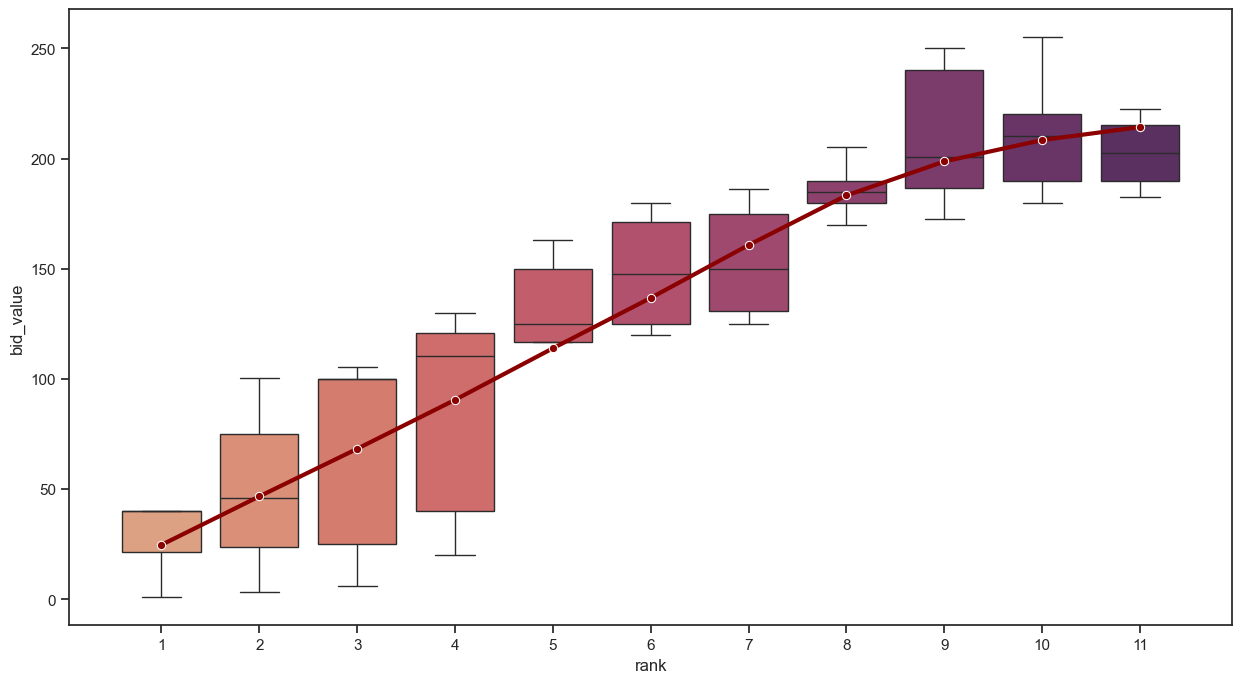

In [91]:
p_df = pd.read_csv("3_bids.csv")
p_df = p_df[(p_df['item_id'] == ItemId.PalmPilotM515PDA.value) & (p_df['auction_type'] == AuctionType.ThreeDay.value) & (p_df['num_bids'] == len(bids))]
p_bids = bids.copy()
p_bids['rank'] = p_bids['rank'].astype(str)
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x="rank", y="bid_value",
             palette="flare",
            data=p_df, ax=ax, showfliers=False)
sns.lineplot(x="rank", y="bid_value", palette="flare", marker="o", data=p_bids, ax=ax, color="darkred", lw=3)
plt.setp(ax.lines, zorder=100)
plt.show()

In [93]:
from sklearn.metrics import mean_squared_error
original_df = pd.read_csv("3_bids.csv")
validation_df = None
for item_id in [ItemId.CartierWristwatch, ItemId.PalmPilotM515PDA, ItemId.XboxGameConsole]:
    for auction_type in [AuctionType.ThreeDay, AuctionType.FiveDay, AuctionType.SevenDay]:
        open_price = original_df.loc[(original_df["item_id"] == item_id.value) & (original_df["auction_type"] == auction_type.value), "open_price"].mean()
        generated_bids = generate_bids(
            item_id,
            auction_type,
            open_price,
            bid_num_prediction_model,
            auction_price_estimation_model,
            bid_rate_prediction_model,
            bit_time_prediction_model,
            bid_value_prediction_model,
            bid_closing_price_prediction_model,
            final_price_prediction_model
        )
        num_bids = len(generated_bids)
        selected_data = original_df.loc[(original_df["item_id"] == item_id.value) & (original_df["auction_type"] == auction_type.value) & (original_df["num_bids"] == num_bids)]
        generated_bids["rmse"] = generated_bids.apply(lambda x: mean_squared_error([x["bid_value"]] * (len(selected_data.loc[selected_data["rank"] == x["rank"]])), selected_data.loc[selected_data["rank"] == x["rank"], "bid_value"], squared=False), axis=1)
        generated_bids["original_std"] = generated_bids.apply(lambda x: selected_data.loc[selected_data["rank"] == x["rank"], "bid_value"].std(), axis=1)
        if validation_df is None:
            validation_df = pd.DataFrame(columns=["item_id", "auction_type", "rank", "num_bids", "rmse", "original_std"])
        validation_df = validation_df.merge(generated_bids[["item_id", "auction_type", "rank", "num_bids", "rmse", "original_std"]], how="outer")

validation_df

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWa

,item_id,auction_type,rank,num_bids,rmse,original_std
0,0,0,1,6,50.774152,56.219985
1,0,0,2,6,51.084240,58.853689
2,0,0,3,6,311.373345,253.984908
3,0,0,4,6,536.505508,451.746610
4,0,0,5,6,546.083093,459.972825
...,...,...,...,...,...,...
69,2,2,6,10,39.687556,38.900476
70,2,2,7,10,38.130409,36.574581
71,2,2,8,10,47.118370,45.840284
72,2,2,9,10,43.691282,42.594683


<Axes: >

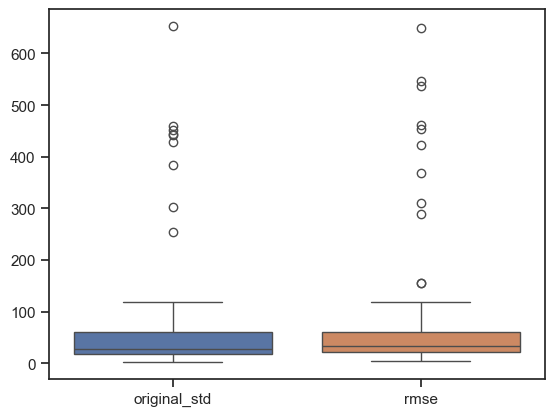

In [94]:
sns.boxplot(validation_df[['original_std', 'rmse']])